## 自己回帰(AR)モデル

In [13]:
import pandas as pd
import numpy as np

# 統計モデル
import statsmodels.api as sm

from matplotlib import pylab as plt
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
learnX = pd.read_csv('../data/treated/use/learn_X.csv')
learny = pd.read_csv('../data/treated/use/learn_y.csv')
testX = pd.read_csv('../data/treated/use/test_X.csv')
testy = pd.read_csv('../data/treated/use/test_y.csv')

learnX["process_end_time"] = pd.to_datetime(learnX["process_end_time"])
learnX["final_mes_time"] = pd.to_datetime(learnX["final_mes_time"])
testX["process_end_time"] = pd.to_datetime(testX["process_end_time"])
testX["final_mes_time"] = pd.to_datetime(testX["final_mes_time"])

learnX = learnX.set_index("final_mes_time")
testX = testX.set_index("final_mes_time")

learny.index = pd.to_datetime(learnX.index)
testy.index = pd.to_datetime(testX.index)

learny.shape

(1155, 1)

In [3]:
learny

,OV
final_mes_time,
2016-09-24 04:22:00,111.2886
2016-09-24 10:12:00,201.5617
2016-09-24 14:11:00,111.9410
2016-09-24 15:30:00,182.3914
2016-09-24 18:31:00,196.2703
...,...
2016-11-27 00:00:00,207.9805
2016-11-27 00:04:00,181.5115
2016-11-27 00:21:00,157.0897


In [4]:
testy

,OV
final_mes_time,
2017-01-18 17:13:00,130.12020
2017-01-18 17:53:00,115.67640
2017-01-18 17:54:00,104.88190
2017-01-18 18:50:00,108.79570
2017-01-18 21:19:00,119.74150
...,...
2017-01-28 15:31:00,74.94453
2017-01-28 19:18:00,59.39213
2017-01-28 19:28:00,70.32605


In [8]:
Y = pd.concat([learny, testy], ignore_index=False)
Y.sort_index(inplace=True)

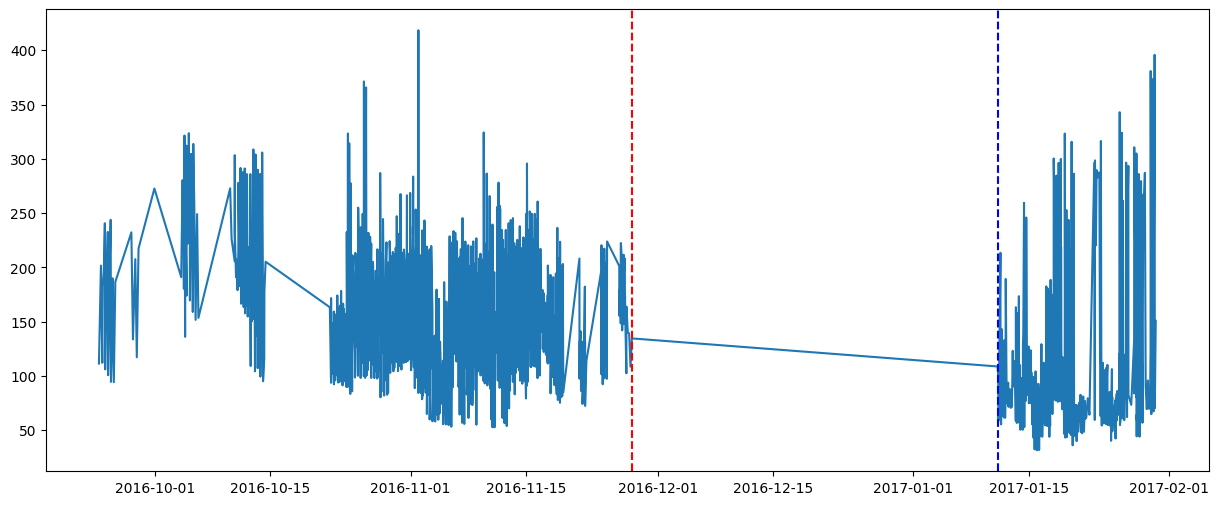

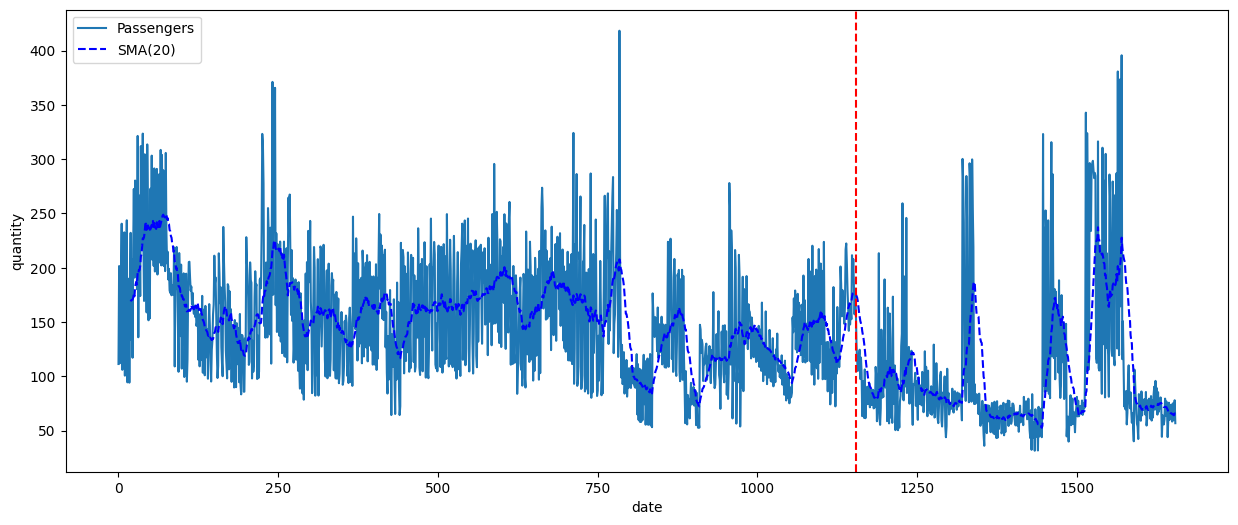

In [85]:
# 移動平均
Y["OV_3ma"] = Y["OV"].rolling(3).mean().round(1)
Y["OV_5ma"] = Y["OV"].rolling(5).mean().round(1)
Y["OV_7ma"] = Y["OV"].rolling(7).mean().round(1)
Y["OV_20ma"] = Y["OV"].rolling(20).mean().round(1)

# 可視化
plt.plot(Y["OV"], label="Passengers")
#plt.plot(Y["OV_3ma"], "k--", label="SMA(3)")
#plt.plot(Y["OV_5ma"], "r--", label="SMA(5)")
#plt.plot(Y["OV_7ma"], "g--", label="SMA(7)")
plt.plot(Y["OV_20ma"], "b--", label="SMA(20)")
plt.xlabel("date")
plt.ylabel("quantity")
plt.axvline(x=len(learny)-0.5, color='red', linestyle='--')
plt.legend()


plt.show()

<Figure size 1200x800 with 0 Axes>

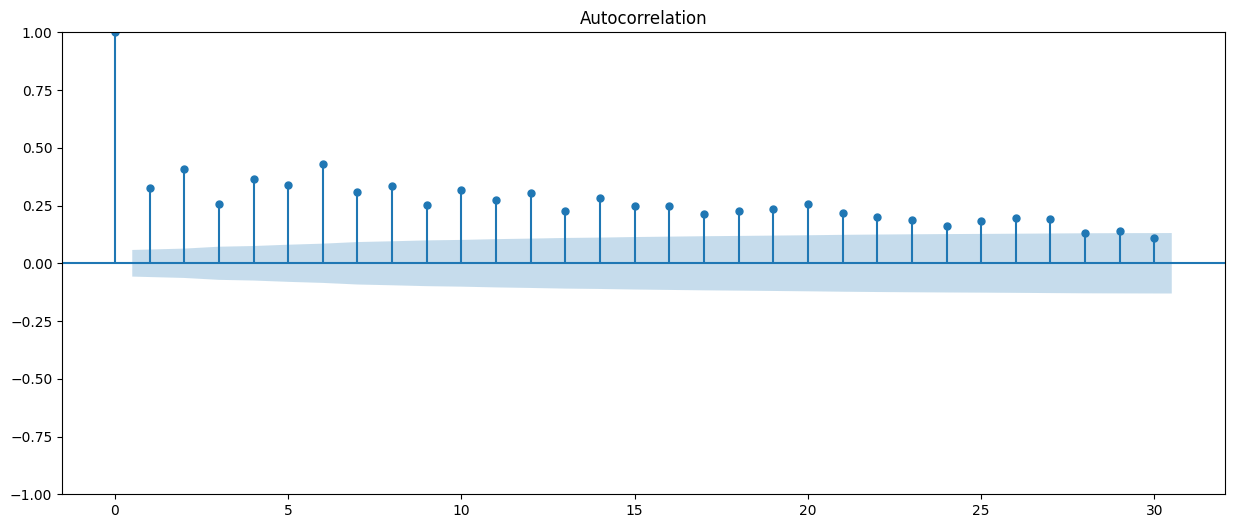

In [86]:
df_acf = sm.tsa.stattools.acf(learny["OV"], nlags=30)

#  自己相関のグラフ
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(learny["OV"], lags=30)

<Figure size 1200x800 with 0 Axes>

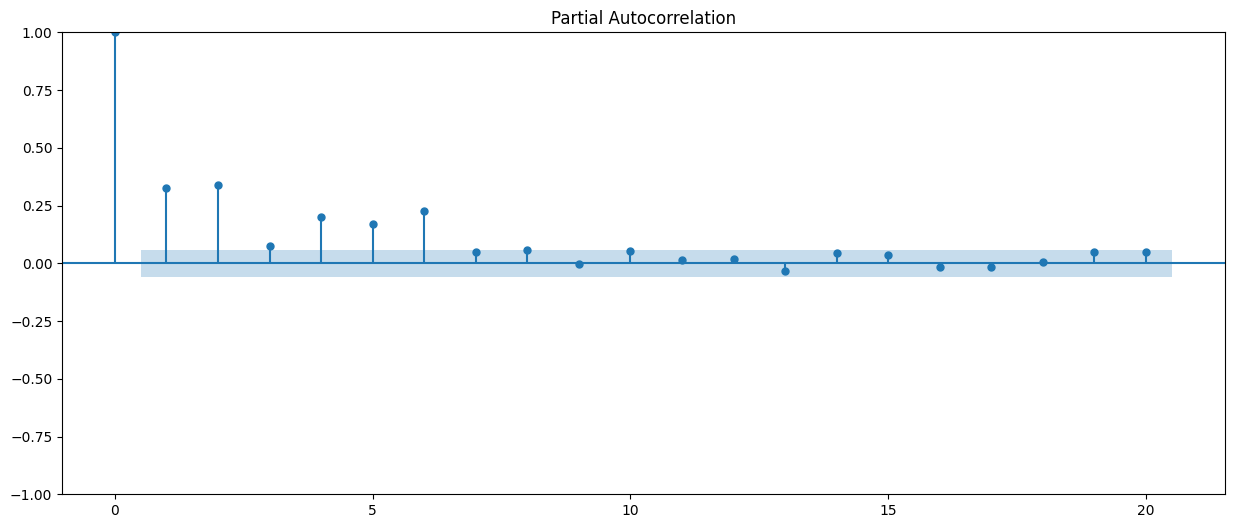

In [87]:
# 偏自己相関を求める
df_pacf = sm.tsa.stattools.pacf(learny["OV"], nlags=20, method='ols')

# 偏自己相関を可視化する
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_pacf(learny["OV"], lags=20)


In [88]:
learnX.index

DatetimeIndex(['2016-09-24 04:22:00', '2016-09-24 10:12:00',
               '2016-09-24 14:11:00', '2016-09-24 15:30:00',
               '2016-09-24 18:31:00', '2016-09-24 21:35:00',
               '2016-09-24 22:32:00', '2016-09-25 01:47:00',
               '2016-09-25 02:53:00', '2016-09-25 06:10:00',
               ...
               '2016-11-26 20:00:00', '2016-11-26 20:03:00',
               '2016-11-26 20:08:00', '2016-11-26 20:26:00',
               '2016-11-26 20:36:00', '2016-11-27 00:00:00',
               '2016-11-27 00:04:00', '2016-11-27 00:21:00',
               '2016-11-27 00:37:00', '2016-11-27 00:47:00'],
              dtype='datetime64[ns]', name='final_mes_time', length=1155, freq=None)

In [89]:
learny = learny.copy()
learny.index = pd.to_datetime(learnX.index, errors="coerce")  # learny側にある前提
learny = learny[~learny.index.isna()].sort_index()

In [90]:
ov = learny["OV"].resample("H").mean()

/var/folders/3b/3hxgpzc57b70j4b1d7my6wfc0000gn/T/ipykernel_51083/3202956487.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ov = learny["OV"].resample("H").mean()


In [91]:
ov = ov.ffill()

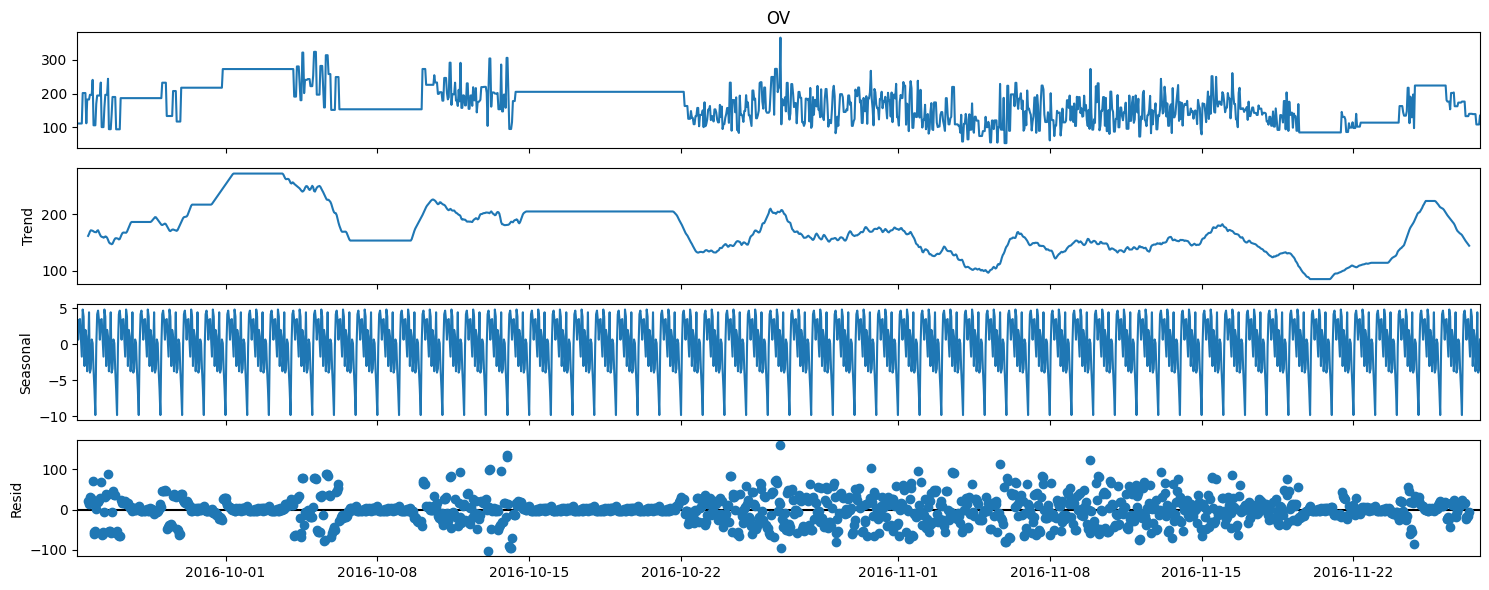

In [92]:
res = sm.tsa.seasonal_decompose(ov, model="additive", period=24)
fig = res.plot()

### 2016/10/22以前を削除して再度、時系列変化を可視化

In [93]:
learnX = learnX[learnX.index > pd.Timestamp("2016-10-22")]
learny = learny[learny.index > pd.Timestamp("2016-10-22")]

In [94]:
learny.head()

,OV
final_mes_time,
2016-10-22 04:51:00,163.15890
2016-10-22 08:12:00,97.81488
2016-10-22 08:14:00,115.19380
2016-10-22 08:17:00,147.54780
2016-10-22 08:31:00,171.64170


In [104]:
learny.tail()

,OV
final_mes_time,
2016-11-27 04:39:00,163.7808
2016-11-27 08:34:00,139.9971
2016-11-27 12:30:00,139.1175
2016-11-27 16:26:00,108.4092
2016-11-27 20:32:00,134.4735


In [98]:
testy.index = pd.to_datetime(testX.index)
testy.head()

,OV
final_mes_time,
2017-01-18 17:13:00,130.1202
2017-01-18 17:53:00,115.6764
2017-01-18 17:54:00,104.8819
2017-01-18 18:50:00,108.7957
2017-01-18 21:19:00,119.7415


In [101]:
Y = pd.concat([learny, testy], ignore_index=False)
Y

,OV
final_mes_time,
2016-10-22 04:51:00,163.15890
2016-10-22 08:12:00,97.81488
2016-10-22 08:14:00,115.19380
2016-10-22 08:17:00,147.54780
2016-10-22 08:31:00,171.64170
...,...
2017-01-28 15:31:00,74.94453
2017-01-28 19:18:00,59.39213
2017-01-28 19:28:00,70.32605


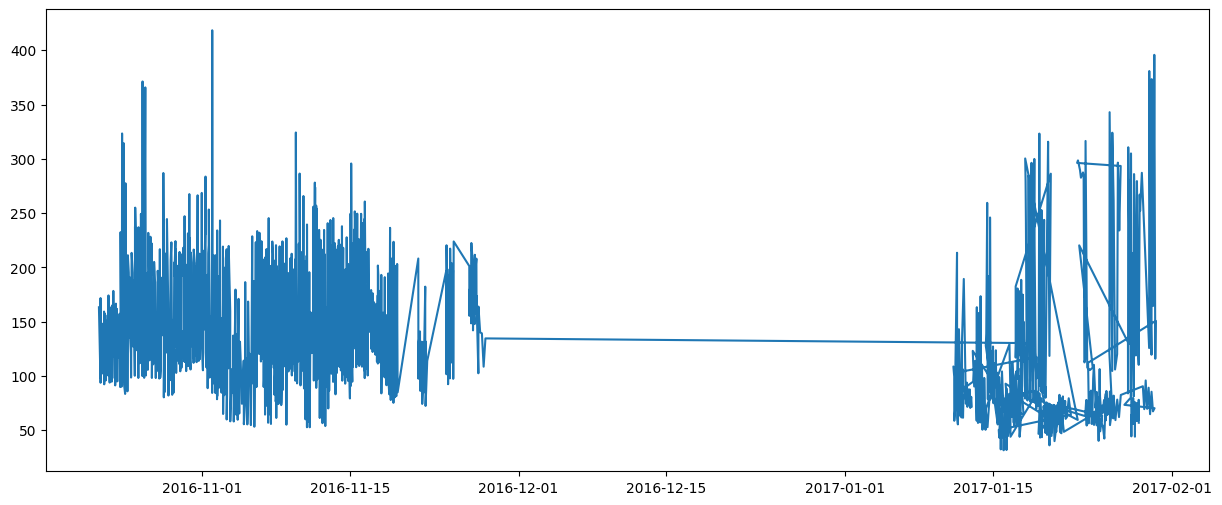

In [103]:

plt.plot(Y.OV)
# 学習用とテスト用の境界に縦線を引く
plt.show()